In [1]:
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import io
import os
import sys
import json
import urllib3
import multiprocessing

from PIL import Image
from tqdm import tqdm
from urllib3.util import Retry

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [177]:
def download_image(fnames_and_urls):
    """
    download image and save its with 90% quality as JPG format
    skip image downloading if image already exists at given path
    :param fnames_and_urls: tuple containing absolute path and url of image
    """
    fname, url = fnames_and_urls
    if not os.path.exists(fname):
        http = urllib3.PoolManager(retries=Retry(connect=3, read=2, redirect=3))
        response = http.request("GET", url)
        image = Image.open(io.BytesIO(response.data))
        image_rgb = image.convert("RGB")
        image_rgb.save(fname, format='JPEG', quality=90)


def parse_dataset(_dataset, _outdir, _max=40000):
    """
    parse the dataset to create a list of tuple containing absolute path and url of image
    :param _dataset: dataset to parse
    :param _outdir: output directory where data will be saved
    :param _max: maximum images to download (change to download all dataset)
    :return: list of tuple containing absolute path and url of image
    """
    _fnames_urls = []
    with open(_dataset, 'r') as f:
        data = json.load(f)
        for image in data["images"]:
            url = image["url"]
            fname = os.path.join(_outdir, "{}.jpg".format(image["imageId"]))
            #fname = os.path.join(_outdir, "{}.jpg".format(image["imageId"]))
            _fnames_urls.append((fname, url))
    return _fnames_urls[:_max]


In [178]:
#check size of data set
import pandas as pd
data = json.load(open('test.json'))
data = pd.DataFrame(data['images'])
data.shape

(39706, 2)

In [179]:
#download images

if __name__ == '__main__':
    if len(sys.argv) != 3:
        print("error: not enough arguments")
        sys.exit(0)

    # get args and create output directory
    dataset, outdir = sys.argv[1:]
    if not os.path.exists(outdir):
        os.makedirs(outdir)

    # parse json dataset file
    fnames_urls = parse_dataset('test.json', 'data/test')

    # download data
    pool = multiprocessing.Pool(processes=12)
    with tqdm(total=len(fnames_urls)) as progress_bar:
        for _ in pool.imap_unordered(download_image, fnames_urls):
            progress_bar.update(1)

    sys.exit(1)
    

100%|██████████| 39706/39706 [13:58<00:00, 47.38it/s]  


SystemExit: 1

Process ForkPoolWorker-5:
Process ForkPoolWorker-11:
Process ForkPoolWorker-8:
Process ForkPoolWorker-9:
Process ForkPoolWorker-6:
Process ForkPoolWorker-3:
Process ForkPoolWorker-10:
Process ForkPoolWorker-1:
Process ForkPoolWorker-12:
Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Process ForkPoolWorker-7:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai

  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
KeyboardInterrupt
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues

In [14]:
len(list(open(f'train.json')))

15052768

In [15]:
dataset

'-f'

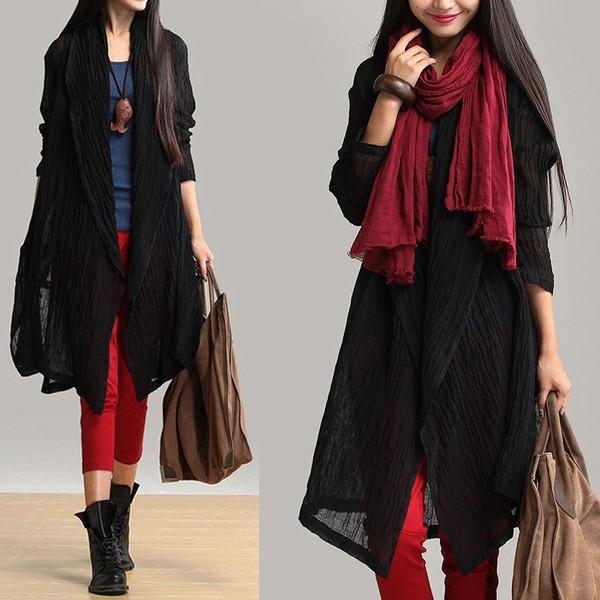

In [20]:
img = Image.open(f'data/validation/23.jpg')
img

# JSON to MultiLabel
https://www.kaggle.com/anqitu/for-starter-json-to-multilabel-in-24-seconds

In [81]:
import time
script_start_time = time.time()

import pandas as pd
import numpy as np
import json

pd.set_option('display.max_rows', 600)
pd.set_option('display.max_rows', 50)
import warnings
warnings.filterwarnings('ignore')

data_path = '' #location where train.json, test.json, and validation.json are

1. Load data from json

In [82]:
# Load data
print('%0.2f min: Start loading data'%((time.time() - script_start_time)/60))

train = {}
test = {}
validation = {}
with open('%strain.json'%(data_path)) as json_data:
    train = json.load(json_data)
with open('%stest.json'%(data_path)) as json_data:
    test = json.load(json_data)
with open('%svalidation.json'%(data_path)) as json_data:
    validation = json.load(json_data)
    
print('Train No. of images: %d'%(len(train['images'])))
print('Test No. of images: %d'%(len(test['images'])))
print('Validation No. of images: %d'%(len(validation['images'])))

0.03 min: Start loading data
Train No. of images: 1014544
Test No. of images: 39706
Validation No. of images: 9897


In [83]:
#JSON to Pandas dataframe

#train data
train_img_url = train['images']
train_img_url = pd.DataFrame(train_img_url)
train_ann = train['annotations']
train_ann = pd.DataFrame(train_ann)
train = pd.merge(train_img_url, train_ann, on='imageId', how='inner')

In [85]:
train['url'][4001]

'https://contestimg.wish.com/api/webimage/53c62899d911393ce9e76c26-large'

In [86]:
#test data
test=pd.DataFrame(test['images'])

In [87]:
#validation data
val_img_url = validation['images']
val_img_url = pd.DataFrame(val_img_url)
val_ann = validation['annotations']
val_ann = pd.DataFrame(val_ann)
validation = pd.merge(val_img_url, val_ann, on='imageId', how='inner' )

In [88]:
train.head()

,imageId,url,labelId
0,1,https://contestimg.wish.com/api/webimage/570f3...,"[95, 66, 137, 70, 20]"
1,2,https://contestimg.wish.com/api/webimage/5468f...,"[36, 66, 44, 214, 105, 133]"
2,3,https://contestimg.wish.com/api/webimage/54641...,"[170, 66, 97, 153, 105, 138]"
3,4,https://contestimg.wish.com/api/webimage/550b9...,"[18, 66, 44, 153, 164]"
4,5,https://contestimg.wish.com/api/webimage/54451...,"[189, 66, 176, 137, 153, 74, 181, 171, 138]"


In [96]:
train['labelId'] = train['labelId'].apply(lambda x: ' '.join(x)) # convert label id from list to string sparated by space

In [98]:
validation['labelId'] = validation['labelId'].apply(lambda x: ' '.join(x))

In [104]:
train_limited = train[:10000]
train_limited.shape

(10000, 3)

In [105]:
train_limited.head()

,imageId,url,labelId
0,1,https://contestimg.wish.com/api/webimage/570f3...,95 66 137 70 20
1,2,https://contestimg.wish.com/api/webimage/5468f...,36 66 44 214 105 133
2,3,https://contestimg.wish.com/api/webimage/54641...,170 66 97 153 105 138
3,4,https://contestimg.wish.com/api/webimage/550b9...,18 66 44 153 164
4,5,https://contestimg.wish.com/api/webimage/54451...,189 66 176 137 153 74 181 171 138


In [13]:
test.head()

,imageId,url
0,1,https://contestimg.wish.com/api/webimage/568e1...
1,2,https://contestimg.wish.com/api/webimage/5452f...
2,3,https://contestimg.wish.com/api/webimage/54058...
3,4,https://contestimg.wish.com/api/webimage/540c6...
4,5,https://contestimg.wish.com/api/webimage/54477...


In [99]:
validation.head()

,imageId,url,labelId
0,1,https://contestimg.wish.com/api/webimage/568e1...,62 17 66 214 105 137 85
1,2,https://contestimg.wish.com/api/webimage/5452f...,95 17 66 214 164 137 20 204 184
2,3,https://contestimg.wish.com/api/webimage/54058...,122 19 66 186 180 44 154 20
3,4,https://contestimg.wish.com/api/webimage/540c6...,190 222 66 153 164 226 53 184
4,5,https://contestimg.wish.com/api/webimage/54477...,62 66 153 171 111 137 70 204 184


# Apply Fast.ai multi-label classification

In [185]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../../../fastai/")
sys.path.append("../../../fastai/courses/dl1")

from fastai.imports import *
from fastai.transforms  import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [186]:
PATH = 'data/'
sz = 224
f_model = resnet34
bs = 128

In [102]:
ls {PATH}

test/  tmp/  train/  validation/


In [106]:
train_limited.drop(columns=['url'],inplace=True)

In [107]:
train_limited.to_csv('train_limited.csv',index=False)
FileLink(label_csv)

/home/paperspace/kaggle/competitions/imaterialist-challenge-fashion-2018/train_limited.csv

In [108]:
#Start new run here after import
label_csv = 'train_limited.csv'

In [109]:
#test using part of training set as validation
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)
val_idxs

array([6252, 4684, 1731, ..., 7853, 1095, 6929])

In [110]:
n

10000

In [187]:
#Need to download validation set
def get_data(sz):
    tfms = tfms_from_model(f_model,sz,aug_tfms=transforms_side_on, max_zoom=1.5)
    return ImageClassifierData.from_csv(PATH,'train',label_csv,tfms=tfms,
                        suffix='.jpg', val_idxs=val_idxs, test_name='test')

In [188]:
data = get_data(256)

In [113]:
fn = PATH+data.trn_ds.fnames[0]; fn

'data/train/2.jpg'

In [114]:
x,y = next(iter(data.val_dl))

In [115]:
y


    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      1     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     1     0
[torch.cuda.FloatTensor of size 64x221 (GPU 0)]

In [116]:
list(zip(data.classes,y[0]))

[('1', 0.0),
 ('10', 0.0),
 ('100', 0.0),
 ('101', 0.0),
 ('102', 0.0),
 ('103', 0.0),
 ('104', 0.0),
 ('105', 0.0),
 ('106', 0.0),
 ('107', 0.0),
 ('108', 0.0),
 ('109', 0.0),
 ('11', 0.0),
 ('110', 0.0),
 ('111', 0.0),
 ('112', 0.0),
 ('113', 0.0),
 ('114', 0.0),
 ('115', 0.0),
 ('116', 0.0),
 ('117', 0.0),
 ('118', 0.0),
 ('119', 0.0),
 ('12', 0.0),
 ('120', 0.0),
 ('121', 0.0),
 ('122', 0.0),
 ('123', 0.0),
 ('124', 0.0),
 ('125', 0.0),
 ('126', 0.0),
 ('127', 0.0),
 ('128', 0.0),
 ('129', 0.0),
 ('13', 0.0),
 ('130', 0.0),
 ('131', 0.0),
 ('132', 0.0),
 ('133', 0.0),
 ('134', 0.0),
 ('135', 0.0),
 ('136', 0.0),
 ('137', 1.0),
 ('138', 0.0),
 ('139', 0.0),
 ('14', 0.0),
 ('140', 0.0),
 ('141', 0.0),
 ('142', 0.0),
 ('143', 0.0),
 ('144', 0.0),
 ('146', 0.0),
 ('147', 0.0),
 ('148', 0.0),
 ('149', 0.0),
 ('15', 0.0),
 ('150', 0.0),
 ('151', 0.0),
 ('152', 0.0),
 ('153', 0.0),
 ('154', 0.0),
 ('155', 0.0),
 ('157', 0.0),
 ('158', 0.0),
 ('159', 0.0),
 ('160', 0.0),
 ('161', 0.0),
 ('

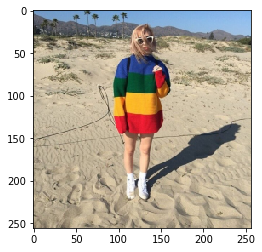

In [117]:
plt.imshow(data.val_ds.denorm(to_np(x))[2])

In [118]:
sz = 64
data = get_data(sz)
data = data.resize(int(sz*1.3), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [207]:
#??? Not sure what the start end and step parameters mean, and how does fastai use metrics
from sklearn.metrics import f1_score
import warnings
def f1(preds, targs, start=0.17, end=0.35,step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([f1_score(targs,(preds>th),average='samples')
               for th in np.arange(start,end,step)]) #check

In [208]:
metrics = [f1]

In [189]:
learn = ConvLearner.pretrained(f_model, data, metrics = metrics)

In [128]:
lrf = learn.lr_find(end_lr=200) #Learning rate has to be set high to get the below graph..

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f1                          
    0      1.799662   8.402571   0.066497  



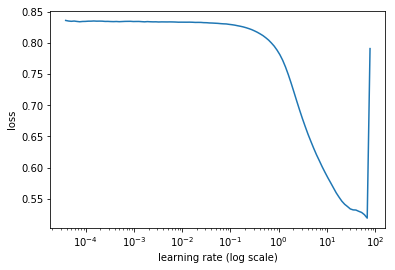

In [129]:
learn.sched.plot()

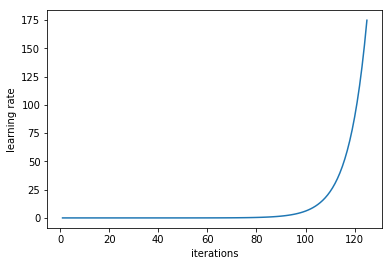

In [130]:
learn.sched.plot_lr()

In [131]:
lr = 10

In [132]:
learn.fit(lr,3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f1                          
    0      0.120698   0.084674   0.39435   
    1      0.083511   0.077211   0.4156                       
    2      0.078322   0.076139   0.425527                     
    3      0.078233   0.075761   0.426245                     
    4      0.077035   0.074985   0.432701                     
    5      0.07565    0.074295   0.436352                     
    6      0.074884   0.074129   0.439369                     



[array([ 0.07413]), 0.43936871425787832]

In [133]:
lrs = np.array([lr/9,lr/3,lr])

In [134]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f1                           
    0      0.07757    0.074773   0.43327   
    1      0.076213   0.073245   0.441706                     
    2      0.072705   0.070963   0.462894                     
    3      0.074269   0.073281   0.438538                     
    4      0.071714   0.070177   0.466414                     
    5      0.068617   0.068816   0.480207                     
    6      0.066365   0.068216   0.486196                     



In [135]:
sz = 128
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr,3,cycle_len=1,cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f1                           
    0      0.070243   0.069316   0.477953  
    1      0.070326   0.06944    0.476264                     
    2      0.069511   0.068745   0.481349                     
    3      0.070181   0.069267   0.477608                     
    4      0.069295   0.068556   0.482115                     
    5      0.068767   0.068321   0.483225                     
    6      0.068177   0.068169   0.485199                     



In [136]:
learn.unfreeze()
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f1                           
    0      0.068908   0.066368   0.495771  
    1      0.068642   0.066567   0.493442                     
    2      0.064331   0.064468   0.510966                     
    3      0.067167   0.066855   0.490851                     
    4      0.064876   0.064762   0.512138                     
    5      0.061624   0.063464   0.518582                     
    6      0.059147   0.063182   0.522811                     



In [137]:
sz=256
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)

learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1,cycle_mult=2)
learn.save(f'{PATH}{sz}') #might need changing

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f1                           
    0      0.064328   0.064236   0.517233  
    1      0.064245   0.064731   0.510929                     
    2      0.063285   0.063964   0.51828                      
    3      0.063946   0.064534   0.516162                     
    4      0.063327   0.063978   0.518194                     
    5      0.062573   0.063685   0.520166                     
    6      0.061849   0.063593   0.521794                     



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f1                           
    0      0.064079   0.062262   0.527354  
    1      0.063977   0.063415   0.521685                     
    2      0.059814   0.061306   0.539297                     
    3      0.062922   0.066046   0.500782                     
    4      0.060625   0.062312   0.530009                     
    5      0.056891   0.060941   0.545529                     
    6      0.054181   0.060857   0.5456                       



In [201]:
learn.load('256')
multiClassPredictions, target_values = learn.TTA()

In [202]:
predictions = np.mean(multiClassPredictions, 0)

In [205]:
predictions

array([[ 0.00033,  0.0013 ,  0.0148 , ...,  0.00339,  0.00577,  0.00794],
       [ 0.00008,  0.00009,  0.00004, ...,  0.01411,  0.0123 ,  0.00095],
       [ 0.00039,  0.00886,  0.00156, ...,  0.04979,  0.01077,  0.01031],
       ..., 
       [ 0.0003 ,  0.00225,  0.00029, ...,  0.00339,  0.0203 ,  0.01827],
       [ 0.00011,  0.01268,  0.00028, ...,  0.00597,  0.02057,  0.00787],
       [ 0.00038,  0.0006 ,  0.15057, ...,  0.06857,  0.02061,  0.03912]], dtype=float32)

In [209]:
f1(predictions,target_values)

0.53962687007881516

In [210]:
predictions.shape

(2000, 221)

In [211]:
multiClassPredictions,target_values = learn.TTA(is_test = True)
predictions = np.mean(multiClassPredictions,0)
predictions.shape

(39706, 221)

In [212]:
df = pd.DataFrame(predictions)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,0.000093,0.000069,2.824977e-04,0.001684,0.001099,0.000084,0.000112,0.741880,0.940533,0.000072,...,0.000153,0.000155,0.602251,0.001304,0.001881,0.000281,0.000267,0.001609,0.000316,0.014660
1,0.000160,0.000667,1.500856e-04,0.008560,0.002654,0.004891,0.000223,0.800847,0.000392,0.000106,...,0.002383,0.000851,0.004244,0.000176,0.000107,0.009277,0.004031,0.054075,0.695869,0.000487
2,0.000205,0.000387,2.943742e-03,0.030948,0.002876,0.007040,0.000455,0.787045,0.208513,0.000232,...,0.001228,0.001201,0.341872,0.002108,0.000818,0.006252,0.004350,0.017571,0.132237,0.362454
3,0.000028,0.000022,8.913660e-07,0.005673,0.017809,0.000017,0.000041,0.686460,0.997608,0.000027,...,0.000005,0.000094,0.000516,0.000074,0.000120,0.000102,0.000320,0.002418,0.000754,0.000273
4,0.000073,0.000060,4.831876e-06,0.002141,0.031564,0.000039,0.000108,0.055823,0.996910,0.000083,...,0.000037,0.000101,0.000181,0.000121,0.001649,0.000117,0.000086,0.002075,0.000372,0.000544


In [213]:
df.columns = data.classes

In [214]:
df.to_feather(f'{PATH}tmp/raw')

In [222]:
df = pd.read_feather(f'{PATH}tmp/raw') #start here

In [223]:
data.classes

['1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '157',
 '158',
 '159',
 '160',
 '161',
 '162',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '195',
 '196',
 '197',
 '198',
 '199',
 '2',
 '20',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '21',
 '210',
 '211',
 '212',
 '213',
 '214',
 '215',
 '216',
 '217',

In [224]:
data.test_ds.fnames
df.insert(0,'image_id',[o[5:-4] for o in data.test_ds.fnames])
df.head()

,image_id,1,10,100,101,102,103,104,105,106,...,9,90,91,92,93,95,96,97,98,99
0,9885,0.000093,0.000069,2.824977e-04,0.001684,0.001099,0.000084,0.000112,0.741880,0.940533,...,0.000153,0.000155,0.602251,0.001304,0.001881,0.000281,0.000267,0.001609,0.000316,0.014660
1,2701,0.000160,0.000667,1.500856e-04,0.008560,0.002654,0.004891,0.000223,0.800847,0.000392,...,0.002383,0.000851,0.004244,0.000176,0.000107,0.009277,0.004031,0.054075,0.695869,0.000487
2,16454,0.000205,0.000387,2.943742e-03,0.030948,0.002876,0.007040,0.000455,0.787045,0.208513,...,0.001228,0.001201,0.341872,0.002108,0.000818,0.006252,0.004350,0.017571,0.132237,0.362454
3,33569,0.000028,0.000022,8.913660e-07,0.005673,0.017809,0.000017,0.000041,0.686460,0.997608,...,0.000005,0.000094,0.000516,0.000074,0.000120,0.000102,0.000320,0.002418,0.000754,0.000273
4,17137,0.000073,0.000060,4.831876e-06,0.002141,0.031564,0.000039,0.000108,0.055823,0.996910,...,0.000037,0.000101,0.000181,0.000121,0.001649,0.000117,0.000086,0.002075,0.000372,0.000544


In [217]:
def applyZeros():
    for x in data.classes:
        df[x].mask(df[x]<0.5,0,inplace=True)
        df[x].mask(df[x]>=0.5,1,inplace=True)
applyZeros()
df.head()

,image_id,1,10,100,101,102,103,104,105,106,...,9,90,91,92,93,95,96,97,98,99
0,9885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,16454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
for x in data.classes:
    df[x].replace(to_replace=0,value="",inplace=True)
    df[x].replace(to_replace=1,value=x+" ",inplace=True)

df.head()

,image_id,1,10,100,101,102,103,104,105,106,...,9,90,91,92,93,95,96,97,98,99
0,9885,,,,,,,,105,106,...,,,91,,,,,,,
1,2701,,,,,,,,105,,...,,,,,,,,,98,
2,16454,,,,,,,,105,,...,,,,,,,,,,
3,33569,,,,,,,,105,106,...,,,,,,,,,,
4,17137,,,,,,,,,106,...,,,,,,,,,,


In [219]:
df_test = df['1']
for x in data.classes[1:]:
    df_test += df[x]
df_test.head()

0       105 106 143 91 
1            105 66 98 
2               105 66 
3        105 106 49 61 
4    106 136 164 49 53 
Name: 1, dtype: object

In [220]:
df_test = df_test.to_frame()

In [221]:
df_test.head()

,1
0,105 106 143 91
1,105 66 98
2,105 66
3,105 106 49 61
4,106 136 164 49 53


In [225]:
data.test_ds.fnames

['test/9885.jpg',
 'test/2701.jpg',
 'test/16454.jpg',
 'test/33569.jpg',
 'test/17137.jpg',
 'test/34407.jpg',
 'test/16733.jpg',
 'test/20677.jpg',
 'test/18697.jpg',
 'test/14175.jpg',
 'test/11231.jpg',
 'test/39354.jpg',
 'test/2964.jpg',
 'test/31132.jpg',
 'test/17718.jpg',
 'test/26049.jpg',
 'test/17201.jpg',
 'test/10651.jpg',
 'test/25799.jpg',
 'test/8302.jpg',
 'test/3656.jpg',
 'test/146.jpg',
 'test/25846.jpg',
 'test/2383.jpg',
 'test/20635.jpg',
 'test/13589.jpg',
 'test/28459.jpg',
 'test/8375.jpg',
 'test/12209.jpg',
 'test/2759.jpg',
 'test/7196.jpg',
 'test/32348.jpg',
 'test/32614.jpg',
 'test/22988.jpg',
 'test/32459.jpg',
 'test/35164.jpg',
 'test/6623.jpg',
 'test/38963.jpg',
 'test/15521.jpg',
 'test/27634.jpg',
 'test/12861.jpg',
 'test/9046.jpg',
 'test/19712.jpg',
 'test/33216.jpg',
 'test/15954.jpg',
 'test/23805.jpg',
 'test/3139.jpg',
 'test/22577.jpg',
 'test/2993.jpg',
 'test/19847.jpg',
 'test/28328.jpg',
 'test/14849.jpg',
 'test/30775.jpg',
 'test/2

In [227]:
df_test.insert(0,'image_name',[o[5:-4] for o in data.test_ds.fnames])


ValueError: cannot insert image_name, already exists

In [228]:
df_test.head()

,image_name,1
0,9885,105 106 143 91
1,2701,105 66 98
2,16454,105 66
3,33569,105 106 49 61
4,17137,106 136 164 49 53


In [229]:
df_test.rename({'1':'label_id'}, axis='columns', inplace=True)

In [234]:
df_test.rename({'image_name':'image_id'}, axis='columns', inplace=True)

In [235]:
df_test.head()

,image_id,label_id
0,9885,105 106 143 91
1,2701,105 66 98
2,16454,105 66
3,33569,105 106 49 61
4,17137,106 136 164 49 53


In [236]:
df_test.to_feather(f'{PATH}df_test')

In [237]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM,exist_ok=True)
df_test.to_csv(f'{SUBM}subm.csv', index=False)
FileLink(f'{SUBM}subm.csv')

/home/paperspace/kaggle/competitions/imaterialist-challenge-fashion-2018/data/subm/subm.csv